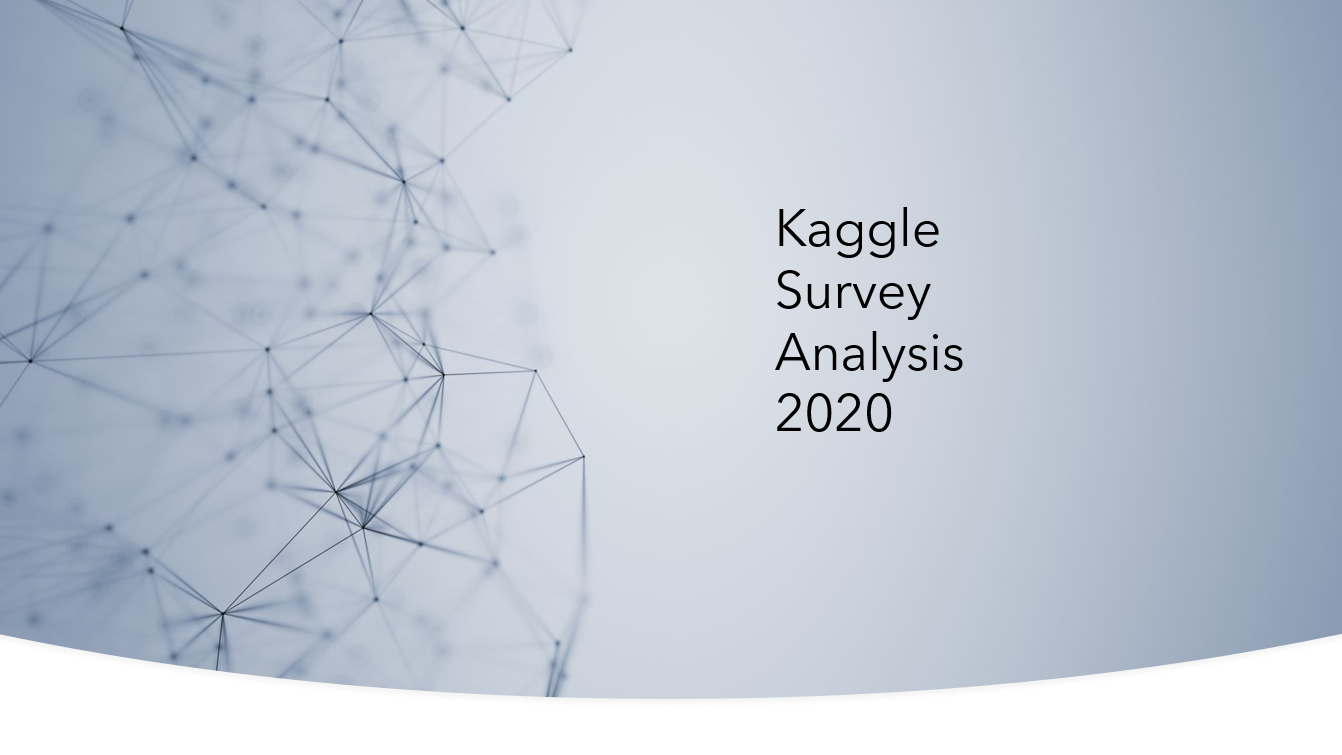

**Survey Methodology:**

● The 2020 Kaggle DS & ML Survey received 20,036 usable responses from participants in 171
different countries and territories. If a country or territory received less than 50 respondents, we
grouped them into a group named “Other” for anonymity.

● An invitation to participate in the survey was sent to the entire Kaggle community (anyone
opted-in to the Kaggle Email List). The survey was also promoted on the Kaggle website and on
the Kaggle Twitter channel.

● The survey was live from 10/07/2020 to 10/30/2020. We allowed respondents to complete the
survey at any time during that window.

● Responses to multiple choice questions (only a single choice can be selected) were recorded in
individual columns. Responses to multiple selection questions (multiple choices can be selected)
were split into multiple columns (with one column per answer choice).

● To protect the respondents’ privacy, free-form text responses were not included in the public
survey dataset, and the order of the rows was shuffled (responses are not displayed in
chronological order).

● We excluded respondents that were flagged by our survey system as “Spam”.

* Note:- Above text is taken from kaggle_survey_2020_methodology.pdf provided along with competition data

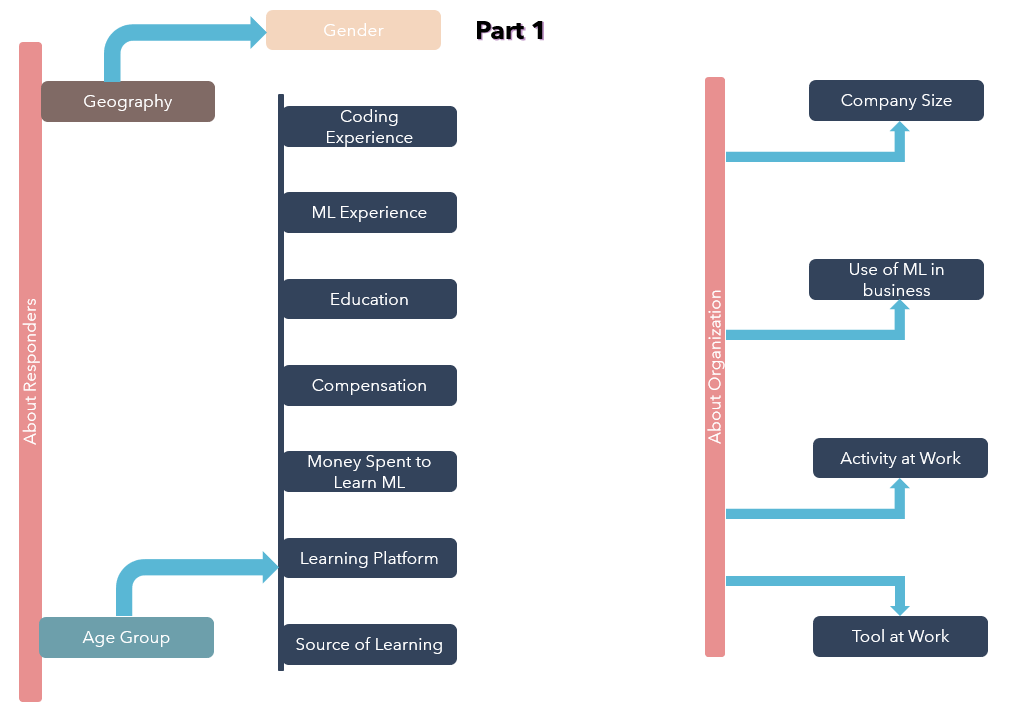

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display,clear_output
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from IPython.core.display import display, HTML

# Load Data
Data has 20036 observation and 355 columns

In [ ]:
data = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',header=1,na_values='NaN')
data = data.fillna('Not Given')
data.head()

# Duration

In [ ]:
fig = make_subplots(rows=1, cols=2)

annotate =[]
title1='Box plot of Time Duration (in Hours)'
title2='Histogram of Time Duration (in Hours)'
strs ="Most of the people finished survey in less <br>" \
        "than an hour <br>" \
        "but there are few people who <br>" \
        "took more time, however percentage <br>" \
        "is marginally low and it seems that these <br>" \
         "people did not fill the survey seriously"


annotate.append(dict(xref='x1', yref='y1',
                            y=350, x=0,
                            text=title1,
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
annotate.append(dict(xref='x2', yref='y2',
                            y=15000, x=150,
                            text=title2,
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
annotate.append(dict(xref='x2', yref='y2',
                            y=5000, x=150,
                            text=strs,
                            font=dict(family='Arial', size=10,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))

fig.layout.annotations=annotate 
fig.add_trace(go.Box(y=data['Duration (in seconds)']/(60*60)),row=1, col=1)

fig.add_trace(go.Histogram(x=data['Duration (in seconds)']/(60*60)),row=1, col=2)

fig.update_layout(height=500, width=900, title_text="Distribution of duration of reponse"
                  ,paper_bgcolor='#EAECEE',plot_bgcolor='#EAECEE',showlegend=False)

fig.show()

# 1 - Repondents by Geography

In [ ]:
def plot_map(grp_data,title=''):
    fig = go.Figure(data=go.Choropleth(
            locations = grp_data['Country'],
            z = grp_data['people'],
            text = grp_data['Country'],
            colorscale = 'earth',
            locationmode = 'country names',
            autocolorscale=False,
            reversescale=False,
            marker_line_color='darkgray',
            marker_line_width=0.5,
            colorbar_tickprefix = '',
            colorbar_title = 'people',
        ))

    fig.update_layout(
        title_text=title,height=500,width=900,
        geo=dict(showframe=False,showcoastlines=False,projection_type='equirectangular'),
        annotations = [dict(x=0.55,y=1,xref='paper',yref='paper'
                            ,text="Most of the respondents are from India followed by USA and Brazil."
                            ,showarrow = False)],
        paper_bgcolor='#EAECEE',plot_bgcolor='#EAECEE'
    )
    fig.show()

In [ ]:
grp_data = data.groupby(by='In which country do you currently reside?').size().sort_values(ascending=False).reset_index()
grp_data.columns =['Country','people']
plot_map(grp_data,title='Repondents by geography')

In [ ]:
cols ={'What is your gender? - Selected Choice': 'gender',
 'What is your age (# years)?': 'age',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?': 'education',
 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice': 'role'
       ,'For how many years have you been writing code and/or programming?':'coding_experiance'
       ,'For how many years have you used machine learning methods?':'ml_experiance'}
data = data.rename(columns=cols)

In [ ]:
def get_chi_square_result(tbl,feature1='Col1',feature2='Col2',alpha=.05):
    
    stat, p, dof, expected = chi2_contingency(tbl)
   
    strs1 = 'significance=%.3f, p=%.3f' % (alpha, p)
    if p <= alpha:
        strs2 ='{0} and {1} are dependent ( Hence we reject H0)'.format(feature1,feature2)
    else:
        strs2 = '{0} and {1} are Independent ( Hence we fail reject H0)'.format(feature1,feature2)
    return(strs1,strs2)

def get_proportion_test(count,nobs):
    stat, pval = proportions_ztest(count, nobs)
    return(pval)

def display_header_html(strs):
    prints = HTML('<h1 style="background-color:#C3CFCD; font-size:120%; font-family:sans-serif; border:2px solid DodgerBlue;">'+ strs +'</h1>')
    display(prints)

def display_paragraph_html(strs):
    prints = HTML('<h1 style="background-color:lightgray; font-size:100%;">'+ strs +'</h1>')
    display(prints)

# 2- Gender

In [ ]:
gender_country = data.groupby(by=['In which country do you currently reside?','gender']).size().sort_values(ascending=False).reset_index()
gender_country.columns =['Country','Gender','Frequency']

obs = gender_country[gender_country.Country.isin(['India'
                                                    ,'United States of America'])].groupby('Country')['Frequency'].sum().tolist()
count =  gender_country[gender_country.Country.isin(['India'
                                                    ,'United States of America']) & (gender_country.Gender=='Man')].groupby('Country')['Frequency'].sum().tolist()

pval_india_usa = get_proportion_test(count,obs)
alpha = .05


count_world =  gender_country.loc[gender_country.Gender=='Man','Frequency'].sum()
obs_world =  gender_country.loc[:,'Frequency'].sum()

pval_india_world = get_proportion_test([count[0],count_world],[obs[0],obs_world])
pval_usa_world = get_proportion_test([count[1],count_world],[obs[1],obs_world])


In [ ]:

strs10 = '\nIndia vs USA : Significance=%.3f, p=%.3f' % (alpha, pval_india_usa)
strs11= """Since p value is more than level of significance then we fail to reject null hypothesis of test of proportion
and conclude that male proportion in India are significantly similar to USA
"""
strs20 = '\nIndia vs World : Significance=%.3f, p=%.3f' % (alpha, pval_india_world)
strs21= """Since p value is less than level of significance then we accept null hypothesis of test of proportion
and conclude that male responder proportion in India is significantly different than male responder proportion of the World"""

strs30 = '\nUSA vs World   : Significance=%.3f, p=%.3f' % (alpha, pval_usa_world)
strs31= """Since p value is less than level of significance then we accept null hypothesis of test of proportion
and conclude that male responder proportion in USA is significantly different than male responder proportion of the World"""

display_header_html(strs10)
display_paragraph_html(strs11)

display_header_html(strs20)
display_paragraph_html(strs21)

display_header_html(strs30)
display_paragraph_html(strs31)


fig = make_subplots(rows=1, cols=3 , specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
                   # ,subplot_titles=("Accross World", "Inida", "USA")
                   )
colors = ['#408CD7','#8D9142','#84C557','#57C59C','#579CC5','#FDEBD0']

gender_country = data.groupby(by=['gender','In which country do you currently reside?']).size().reset_index()
gender_country.columns = ['Gender','Country','Frequency']

for i,country in enumerate(['All','India','United States of America']):
    if i ==0:
        gender = gender_country.groupby('Gender')['Frequency'].sum().reset_index()
        gender.columns =['Gender','Frequency']
    else:
        gender = gender_country[gender_country['Country']==country]
    
    fig.add_trace(go.Pie(labels=gender.Gender
                         , values=gender.Frequency
                         , name=country,marker_colors =colors,textinfo='label+percent' ),1, i+1)

fig.update_traces(hole=.3)
strs = """<b>Gender proportion across the world vs top 2 countries India and USA based on number of responders</b>"""
fig.update_layout(width=1000,
    title_text =strs,
    font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple")
    ,annotations=[dict(text='Overall', x=0.11, y=0.5, font_size=10, showarrow=False)
                  ,dict(text='Men', x=0.50, y=0.5, font_size=10, showarrow=False)
                  ,dict(text='Women', x=0.87, y=0.5, font_size=10, showarrow=False)]
    ,legend=dict(orientation="h",yanchor="bottom",y=0,xanchor="right",x=1),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)')
fig.show()

# 3 - Shanky View of proportion among Age, Gender, education, role and years of experiance.
Lets view the proportion in one view and below we will analyze each feature independently and in pair.

In [ ]:
df = data[['age','gender','education','role','coding_experiance','ml_experiance']].sort_values(by='age').copy()
df['role1']=np.where(df.role=='Student','Student',np.where(df.role=='Not Given','Not Given','Working Professionals'))
#df = df.drop(columns='role')

node = df.melt().value.unique().tolist()
node_map = dict([(val,idx) for idx , val in enumerate(node)])
df['gender'] = df.gender.map(node_map)
df['age'] = df.age.map(node_map)
df['education'] = df.education.map(node_map)
df['role1'] = df.role1.map(node_map)
df['role'] = df.role.map(node_map)
df['coding_experiance'] = df.coding_experiance.map(node_map)
df['ml_experiance'] = df.ml_experiance.map(node_map)
df=df.sort_values(by='age')

shanky_grp1 = df.groupby(by = ['age','gender']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'age':'target'
                                                                                       ,'gender':'source'})


shanky_grp2 = df.groupby(by = ['age','education']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'age':'source'
                                                                                       ,'education':'target'})
shanky_grp3 = df.groupby(by = ['education','role1']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'education':'target'
                                                                                       ,'role1':'source'})

shanky_grp4 = df.groupby(by = ['role1','coding_experiance']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'role1':'source'
                                                                                       ,'coding_experiance':'target'})

shanky_grp5 = df.groupby(by = ['ml_experiance','coding_experiance']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'ml_experiance':'source'
                                                                                       ,'coding_experiance':'target'})

shanky_grp6 = df.groupby(by = ['ml_experiance','role1']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'ml_experiance':'source'
                                                                                       ,'role1':'target'})
shanky_grp7 = df.groupby(by = ['ml_experiance','role']).size().reset_index().rename(columns={0:'frequency'
                                                                                       ,'ml_experiance':'source'
                                                                                       ,'role':'target'})


# 4- Gender vs Age group

In [ ]:
def plot_shanky(data,node):
    fig = go.Figure(data=[go.Sankey(
        #valueformat = ".0f",
        #valuesuffix = "TWh",
        orientation = "v",
        node = dict(
          pad = 15,
          thickness = 15,
          line = dict(color = "lightblue", width = 0.5),
          label =  node,
            
        ),

        link = dict(
          source =  data['source'],
          target =  data['target'],
          value =  data['frequency'],
          color = data['color']

    ))])
    #fig.update_traces(link_color='#76B8D3', selector=dict(type='sankey'))
    return(fig)
header = "Gender vs Age group"
strs = """Most of the responders are male and the age group is between 18 t0 30 years and almost same pattern applied
to female responders"""

shanky_grp = shanky_grp1.copy()
shanky_grp['color']=np.where(shanky_grp1.source==12,'#408CD7',np.where(shanky_grp1.source==11,'#8D9142','#57C59C'))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# 5 - Age group vs Education

In [ ]:
header = "Age group vs Education"
strs = """Most of the responders have Bachelor's or Master's degree. There are 414 responders out of 20k who completed
their master degree in age of 18 to 21.<br> We also can see few responders did their master degree in the age of 45 to 60"""

#shanky_grp = pd.concat([shanky_grp1,shanky_grp2])
shanky_grp = shanky_grp2.copy()
shanky_grp['color']=np.where(shanky_grp.target==18,'#408CD7'
                             ,np.where(shanky_grp.target==20,'#8D9142'
                                       ,np.where(shanky_grp.target==23,'#567987','#57C59C')))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# 6 - Role vs Education

In [ ]:
header = "Role vs education"
strs = """As below charts exhibits that most of the responders are working professionals and most of them have master degree."""

#shanky_grp = pd.concat([shanky_grp1,shanky_grp2])
shanky_grp = shanky_grp3.copy()
shanky_grp['color']=np.where(shanky_grp.target==18,'#408CD7'
                             ,np.where(shanky_grp.target==20,'#8D9142'
                                       ,np.where(shanky_grp.target==23,'#567987','#57C59C')))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# 7- Role vs Coding Experiance

In [ ]:
header = "Role vs Coding experiance"
strs = """ Majority of responders are having master degree with 1 to 5 years of experience. Interesting 
fact which is coming out form below chart is that, <br> there are students who has some experience of at least 1 year
which indicates that they took admission after gaining experience of few years.
"""
#shanky_grp = pd.concat([shanky_grp1,shanky_grp2])
shanky_grp = shanky_grp4.copy()
shanky_grp['color']=np.where(shanky_grp.target==18,'#408CD7'
                             ,np.where(shanky_grp.target==20,'#8D9142'
                                       ,np.where(shanky_grp.target==23,'#567987','#57C59C')))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# 8 - Coding Experiance vs ML experiance

In [ ]:
header = "Coding Experiance vs ML experiance"
strs = """Those who has never written code as expected do not have experience in ML.<br>
          The responders who have less than a year of experience in ML has more than 1 years of experience in coding.<br>
            Which indicates that majority of responders has switch their job into Machine learning.
"""

shanky_grp = shanky_grp5.copy()
shanky_grp['color']=np.where(shanky_grp.target==18,'#408CD7'
                             ,np.where(shanky_grp.target==20,'#8D9142'
                                       ,np.where(shanky_grp.target==23,'#567987','#57C59C')))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# 9 - Role vs ML experiance

In [ ]:
header = "Role vs ML experiance"
strs = """ Most of responders who are data scientist have less than 2 years of experience data. """

shanky_grp = shanky_grp7.copy()
shanky_grp['color']=np.where(shanky_grp.target==18,'#408CD7'
                             ,np.where(shanky_grp.target==20,'#8D9142'
                                       ,np.where(shanky_grp.target==23,'#567987','#57C59C')))

plot=plot_shanky(data = shanky_grp,node=node)

plot.update_layout(title_text=header,title_font_color="black"
                  ,font_size=10,height=600,width=1000,paper_bgcolor='#EAECEE'
                   ,plot_bgcolor='#EAECEE'
                  ,annotations=[dict(text=strs, x=-.04, y=1.1, font_size=11, showarrow=False)])
plot.show()

# Age vs Experiance in Top country based on number of responders

In [ ]:
grp_data_country_age = data.groupby(by=['In which country do you currently reside?'
                        ,'age']).size().sort_values(ascending=False).reset_index()
grp_data_country_age.columns =['Country','Age','people']
grp_data_country_age['people_perc'] = grp_data_country_age.people/grp_data_country_age.groupby('Country')['people'].transform('sum')

grp_data_country_exp = data.groupby(by=['In which country do you currently reside?'
                        ,'ml_experiance',]).size().sort_values(ascending=False).reset_index()
grp_data_country_exp.columns =['Country','exp','people']
grp_data_country_exp['people_perc'] = grp_data_country_exp.people/grp_data_country_exp.groupby('Country')['people'].transform('sum')
#grp_data_country_exp['people_perc']=grp_data_country_exp['people_perc']*(-1)


In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, vertical_spacing=0.001)

top_5_country = grp_data_country_age.groupby('Country')['people'].sum().sort_values(ascending=False).head(5).index.tolist()

age = grp_data_country_age.Age.unique().tolist()
exp=grp_data_country_exp.exp.unique().tolist()

color_age = ['#C5AA57','#57BAC5','#84C557','#57C59C','#579CC5','#FDEBD0','#ABEBC6','#F5B7B1','#AF601A','#2C3E50','#1A5276']
color_exp = ['#17202A','#6E2C00','#7D6608','#145A32','#4A235A','#78281F','#85929E','#F1948A','#567987','#56877E']

for i,ag in enumerate(age):
    d1 = grp_data_country_age[(grp_data_country_age.Age==ag) & (grp_data_country_age.Country.isin(top_5_country))]
    
    fig.add_trace(go.Bar(name =ag,y=d1.Country, x=d1.people_perc,
                         marker_color=color_age[i],orientation='h'),row=1, col=1)

for i,ex in enumerate(exp):
    d2 = grp_data_country_exp[(grp_data_country_exp.exp==ex) & (grp_data_country_exp.Country.isin(top_5_country))]
    
    fig.add_trace(go.Bar(name =ex,y=d2.Country, x=d2.people_perc,
                         marker_color=color_exp[i],orientation='h'),row=1, col=2)

strs ="""Approx. 80%, 30%,40% and 34%  of respondents are from India, USA, Brazil and Japan respectively out of
all respondents from respective countries.<br>Also 49% ,22%,30% and 30% of respondents have 
less than 2 years of experience from above countries out of all respondents from respective countries."""

fig.update_layout(
    title=strs,barmode='stack',font_size=8,width=1000,height=800,
    yaxis=dict(showgrid=False,showline=False,showticklabels=True,domain=[0, 0.85],title='Country'),
    yaxis2=dict(showgrid=False,showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,domain=[0, 0.85]),
    xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
    xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25000),
    legend=dict(orientation="h",yanchor="bottom",y=.85,xanchor="right",x=1),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)


fig.show()

#  Programming languages use on a regular basis

In [ ]:
import itertools
import re 

def str_replace(string, char): 
    pattern = char + '{2,}'
    string = re.sub(pattern, char, string) 
    return string 

programming_cols = data.filter(regex='What programming languages do you use on a regular basis',axis=1).columns.tolist()
programming_cols =['gender']+programming_cols
grp_programming = data.groupby(by=programming_cols).size().reset_index()
cols = ['gender','Python','R','SQL','C','C++','Java','Javascript','Julia'
                          ,'Swift','Bash','Matlab','None','Other','frequency']
grp_programming.columns =cols
grp_programming.head()
grp_programming['pair'] = grp_programming[cols[1:-1]].apply(lambda row: ' '.join(row.values.astype(str)).strip(), axis=1)
grp_programming['pair'] = grp_programming['pair'].apply(lambda x:x.replace('Not Given','').strip())
grp_programming['pair'] = grp_programming['pair'].apply(lambda x: ' '.join(sorted(x.split())))
grp_programming = grp_programming.sort_values(by='frequency',ascending=False)
grp_programming = grp_programming[grp_programming.frequency>100]
grp_programming['pair'] = grp_programming['pair'].apply(lambda x:'Empty' if len(x)==0 else x)


In [ ]:
fig = go.Figure()
for i,ge in enumerate(['Man','Woman']):
    d1 = grp_programming[grp_programming.gender==ge]
    
    fig.add_trace(go.Bar(name =ge,x=d1.pair, y=d1.frequency,
                         marker_color=color_age[i],base=0))

strs = """16% of respondents are using python as independent programming language and <br>7% are using python along with SQL 
        for data science where as 10% of <br>respondents choose not to reveal their option"""

annotate =[]
annotate.append(dict(xref='x1', yref='y1',
                            y=2200 ,x=10
                             ,text=strs,
                            font=dict(family='Arial', size=15,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))

fig.layout.annotations=annotate 

fig.update_layout(barmode='stack',title_text='Programming Skill Set',font_size=10,width=900,height=500
                  , yaxis = dict(title='# Respondent')
                  ,legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))

fig.show()

# Recommended Programming languages

In [ ]:
cls = 'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

color_recommend = ['#5D6D7E','#F1948A','#7D6608','#145A32','#4A235A','#78281F','#85929E','#F1948A'
             ,'#57C59C','#579CC5','#FDEBD0','#ABEBC6','#F5B7B1','#AF601A']

for i,ge in enumerate(['Man','Woman']):
    recomend_prgraming = data.loc[data.gender==ge,cls].value_counts().reset_index()
    recomend_prgraming.columns =['recommend','freq']

    fig.add_trace(go.Pie(labels=recomend_prgraming.recommend
                         , values=recomend_prgraming.freq
                         , name=ge,marker_colors =color_recommend ),1, i+1)

fig.update_traces(hole=.3)
strs = """ 65% Women prefer python compare to other programming language whereas this percentage <br>
is quite up in case of men recommendation of programming skill. If we see second and third recommendation <br>
which are R and SQL, then women percentage is slightly higher sided compare to men which means more women <br>
recommending R and SQL as data science programming language to other aspiring data scientists.
"""
fig.update_layout(
    title_text =strs,
    font=dict(family="Courier New, monospace",size=10,color="RebeccaPurple")
    ,annotations=[dict(text='Men', x=0.20, y=0.5, font_size=15, showarrow=False),
                 dict(text='Women', x=0.82, y=0.5, font_size=15, showarrow=False)])
fig.show()

# Integrated development environments

In [ ]:
from wordcloud import WordCloud

col_pat = "Which of the following integrated development environments"

ide_cols = data.filter(regex=col_pat ,axis=1).columns.tolist()
ide = data[ide_cols].apply(lambda row: ' '.join(row.values.astype(str)).strip(), axis=1)
ide = ide.apply(lambda x:x.replace('Not Given','').strip())

plt.figure(figsize=(10,10))

word_cloud = WordCloud (
                    background_color = 'white',
                    width = 2000,
                    height = 1000
                        ).generate(' '.join(ide.tolist()))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('Most frequent used IDE')
plt.show()

# Hosted Notebook

In [ ]:

col_pat = "Which of the following hosted notebook products do you use on a regular basis"

grp_notebook = data.filter(regex=col_pat ,axis=1).melt()
grp_notebook = grp_notebook[grp_notebook.value!='Not Given']
grp_notebook = grp_notebook.value.value_counts(normalize=True,ascending=True).reset_index()
grp_notebook.columns = ['Notebook','perc']

fig = go.Figure()

fig.add_trace(go.Bar(x=grp_notebook.perc,y=grp_notebook.Notebook,
    marker=dict(color='#F5CBA7',line=dict(width=20)),
    orientation='h'))

fig.add_trace(go.Scatter(x=grp_notebook.perc,y=grp_notebook.Notebook,
    mode='markers',marker_symbol='circle',
    line_color='#1B2631',
    name='Notebook',marker=dict(color='#1B2631',size=5,line=dict(color='#1B2631',width=12)),
        showlegend=False))

fig.update_layout(title_text="Hosted Notebook used on a regular basis",font_size=10,height=700,width=800)
fig.show()

Please upvote if you like any of the analysis and also provide your feedback if see any mistake or I could have done in better way.

Note:- This notebook is not final version, there will be modification.